## Final Project Submission

Please fill out:
* Student name: Abdulrahman Aber, Benjamin Bai, Charles Pan, Kevin Rivera
* Student pace: Full Time
* Scheduled project review date/time: 
* Instructor name: David Elliott
* Blog post URL:


# Imports

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3 as sq
import statistics as st
import seaborn as sns
from datetime import datetime

# Release Date Month Visualizations 

In [95]:
#read tn movie file and check info
tn_movies = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')
tn_movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [96]:
tn_movies.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


# Tn_Movies cleaning process 

In [97]:
#Get rid of punctuation on worldwide_gross column
tn_movies['worldwide_gross'] = tn_movies['worldwide_gross'].replace('[\$,]', '', regex=True)
#Get rid of punctuation on domestic_gross column
tn_movies['domestic_gross'] = tn_movies['domestic_gross'].replace('[\$,]', '', regex=True)
#Get rid of punctuation on production_budget column
tn_movies['production_budget'] = tn_movies['production_budget'].replace('[\$,]', '', regex=True)
#change worldwide_gross column to float
tn_movies['worldwide_gross'] = tn_movies['worldwide_gross'].astype(float)
#change domestic_gross column to int
tn_movies['domestic_gross'] = tn_movies['domestic_gross'].astype(int)
#change production_budget column to int
tn_movies['production_budget']=tn_movies['production_budget'].astype(int)
#create a net_income column by taking domestic_gross and subtracting production budget
tn_movies["net_income"]=tn_movies['worldwide_gross']-tn_movies['production_budget']
#create a cost_revenue_ratio by taking net income and dividing it by production budget
tn_movies["Cost_Rev_Ratio"]=((tn_movies['net_income'])/(tn_movies['production_budget']))*100
#change all cost_rev values into int 
tn_movies["Cost_Rev_Ratio"] =tn_movies["Cost_Rev_Ratio"].astype(int)
#change release_date column into datetime format
tn_movies["release_date"] = pd.to_datetime(tn_movies["release_date"])
#create a month and year column
tn_movies['year'] = pd.DatetimeIndex(tn_movies['release_date']).year
tn_movies['month'] = pd.DatetimeIndex(tn_movies['release_date']).month
# time frame: 2010-Present & SAG definition of theatrical budget: > 2 million
tn_movies_2010 = tn_movies[(tn_movies['production_budget'] > 1999999) & (tn_movies['year'] >= 2010)]

In [98]:
tn_movies_2010.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1851 entries, 1 to 5000
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 1851 non-null   int64         
 1   release_date       1851 non-null   datetime64[ns]
 2   movie              1851 non-null   object        
 3   production_budget  1851 non-null   int32         
 4   domestic_gross     1851 non-null   int32         
 5   worldwide_gross    1851 non-null   float64       
 6   net_income         1851 non-null   float64       
 7   Cost_Rev_Ratio     1851 non-null   int32         
 8   year               1851 non-null   int64         
 9   month              1851 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(3), object(1)
memory usage: 137.4+ KB


In [99]:
tn_movies_2010.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_income,Cost_Rev_Ratio,year,month
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,6.350639e+08,154,2011,5
2,3,2019-06-07,Dark Phoenix,350000000,42762350,1.497624e+08,-2.002376e+08,-57,2019,6
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1.403014e+09,1.072414e+09,324,2015,5
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1.316722e+09,9.997217e+08,315,2017,12
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2.053311e+09,1.747311e+09,571,2015,12


In [100]:
#created a list with all the Cost_Rev_Ratios in tn_movies_2010
Cost_Rev_Ratio = [x for x in tn_movies_2010["Cost_Rev_Ratio"]] 
#created a list of all the month value associated with each cost_rev_ratio
Month = [x for x in tn_movies_2010['month']]
#mapped both list into a master list as tuples
Cost_Rev_Ratio_Month = list(map(lambda *x: x, Month, Cost_Rev_Ratio))
#created a function that would take in associated number and append a new list of Cost_Rev_Ratio based on associated month value
#get the mean of the list by associated month  
def month_mean(num):
    x = []
    for index, tuple in enumerate(Cost_Rev_Ratio_Month):
        element_one = tuple[0]
        element_two = tuple[1]
        if element_one == num:
            x.append(element_two)
    return(st.mean(x))
#created a function that would take in associated number and append a new list of Cost_Rev_Ratio based on associated month value
#get the median of the list by associated month 
def month_median(num):
    x = []
    for index, tuple in enumerate(Cost_Rev_Ratio_Month):
        element_one = tuple[0]
        element_two = tuple[1]
        if element_one == num:
            x.append(element_two)
    return(st.median(x))

In [101]:
#created dictionary to map month_index to month_list
month_index = [1,2,3,4,5,6,7,8,9,10,11,12]
month_list = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec']
mapped_months = dict(map(lambda *x: x, month_index, month_list))

In [105]:
#made two list using functions above of all medians per month and means per month 
by_month_mean_list = []
by_month_median_list = []
for num in mapped_months.keys():
    by_month_mean_list.append(month_mean(num))
    by_month_median_list.append(month_median(num))

In [106]:
#created two dictionaries that mapped values of the two list above to associated month 
month_mean = dict(map(lambda *x: x, month_list, by_month_mean_list))
month_median = dict(map(lambda *x: x, month_list, by_month_median_list))

In [107]:
month_mean

{'Jan': 242.28571428571428,
 'Feb': 215.30714285714285,
 'Mar': 151.95209580838323,
 'Apr': 156.03947368421052,
 'May': 211.47058823529412,
 'June': 234.1631205673759,
 'July': 288.6136363636364,
 'Aug': 194.85034013605443,
 'Sept': 159.99397590361446,
 'Oct': 270.6309523809524,
 'Nov': 233.86335403726707,
 'Dec': 136.70697674418605}

In [108]:
month_median

{'Jan': 76.0,
 'Feb': 98.5,
 'Mar': 77,
 'Apr': 66.0,
 'May': 127.0,
 'June': 103,
 'July': 167.5,
 'Aug': 94,
 'Sept': 67.0,
 'Oct': 50.0,
 'Nov': 125,
 'Dec': 72}

# Visualization of Month to Cost_Rev_Ratio of all data in tn_movies_2010

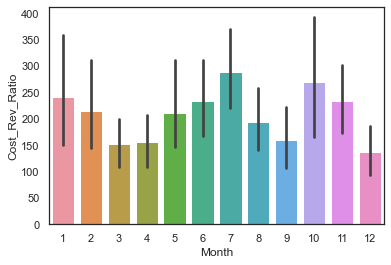

In [90]:
df = pd.DataFrame({'Month': Month,
                   'Cost_Rev_Ratio': Cost_Rev_Ratio,})
#set seaborn plotting aesthetics
sns.set(style='white')

#create grouped bar chart
sns.barplot(x='Month', y='Cost_Rev_Ratio',  data=df);

# Visualization of Month to Cost_Rev_Ratio by mean of months 

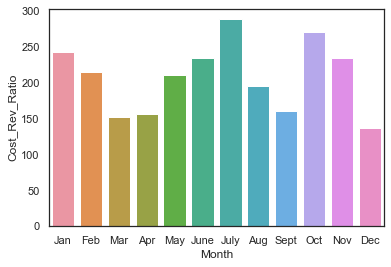

In [91]:
df1 = pd.DataFrame({'Month': month_mean.keys(),
                   'Cost_Rev_Ratio': month_mean.values(),})
#set seaborn plotting aesthetics
sns.set(style='white')

#create grouped bar chart
sns.barplot(x='Month', y='Cost_Rev_Ratio',  data=df1);

# Visualization of Month to Cost_Rev_Ratio by median of months

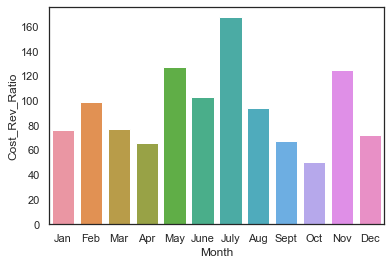

In [110]:
df2 = pd.DataFrame({'Month': month_median.keys(),
                   'Cost_Rev_Ratio': month_median.values(),})
#set seaborn plotting aesthetics
sns.set(style='white')

#create grouped bar chart
sns.barplot(x='Month', y='Cost_Rev_Ratio',  data=df2);